# NFCORPUS

NFCorpus is a full-text English retrieval data set for Medical Information Retrieval. It contains a total of 3,244 natural language queries (written in non-technical English, harvested from the NutritionFacts.org site) with 169,756 automatically extracted relevance judgments for 9,964 medical documents (written in a complex terminology-heavy language), mostly from PubMed.

#### Terms of Use
NFCorpus is free to use for academic purposes. For any other uses of the included NutritionFacts.org data please consult Terms of Service and contact its author Dr. Michael Greger directly.
If you use the corpus in your work, please cite: (Boteva et al., 2016).

In [1]:
import pandas as pd
import ir_datasets
import matplotlib.pyplot as plt
import itertools
import collections
from nltk.corpus import stopwords

dataset = ir_datasets.load("beir/nfcorpus")
dataset_dev = ir_datasets.load("beir/nfcorpus/dev")
dataset_train = ir_datasets.load("beir/nfcorpus/train")
dataset_test = ir_datasets.load("beir/nfcorpus/test")

## Create a dataframe with the documents, queries and qrels

In [2]:
# Dataframe with the documents
df_docs = pd.DataFrame(dataset.docs_iter())
df_docs

,doc_id,text,title,url
0,MED-10,"Recent studies have suggested that statins, an...",Statin Use and Breast Cancer Survival: A Natio...,http://www.ncbi.nlm.nih.gov/pubmed/25329299
1,MED-14,BACKGROUND: Preclinical studies have shown tha...,Statin use after diagnosis of breast cancer an...,http://www.ncbi.nlm.nih.gov/pubmed/25304447
2,MED-118,The aims of this study were to determine the c...,Alkylphenols in human milk and their relations...,http://www.ncbi.nlm.nih.gov/pubmed/20435081%20
3,MED-301,Epilepsy or seizure disorder is one of the mos...,Methylmercury: A Potential Environmental Risk ...,http://www.ncbi.nlm.nih.gov/pubmed/22206970
4,MED-306,Hit Reaction Time latencies (HRT) in the Conti...,Sensitivity of Continuous Performance Test (CP...,http://www.ncbi.nlm.nih.gov/pubmed/20699117
...,...,...,...,...
3628,MED-917,Scottish-grown red raspberries are a rich sour...,Effect of freezing and storage on the phenolic...,http://www.ncbi.nlm.nih.gov/pubmed/12188629
3629,MED-941,BACKGROUND: Common warts (verruca vulgaris) ar...,Topical vitamin A treatment of recalcitrant co...,http://www.ncbi.nlm.nih.gov/pubmed?term=cider%...
3630,MED-942,Apple cider vinegar products are advertised in...,Esophageal injury by apple cider vinegar table...,http://www.ncbi.nlm.nih.gov/pubmed/15983536
3631,MED-952,The use of cannabis is embedded within many so...,Cannabis and the lung.,http://www.ncbi.nlm.nih.gov/pubmed/21132143


In [3]:
# Create a dataframe with the queries
df_queries = pd.DataFrame(dataset.queries_iter())
df_queries

,query_id,text,url
0,PLAIN-3,Breast Cancer Cells Feed on Cholesterol,http://nutritionfacts.org/2015/07/14/breast-ca...
1,PLAIN-4,Using Diet to Treat Asthma and Eczema,http://nutritionfacts.org/2015/07/09/using-die...
2,PLAIN-5,Treating Asthma With Plants vs. Pills,http://nutritionfacts.org/2015/07/07/treating-...
3,PLAIN-6,How Fruits and Vegetables Can Treat Asthma,http://nutritionfacts.org/2015/07/02/how-fruit...
4,PLAIN-7,How Fruits and Vegetables Can Prevent Asthma,http://nutritionfacts.org/2015/06/30/how-fruit...
...,...,...,...
3232,PLAIN-3432,Healthy Chocolate Milkshakes,http://nutritionfacts.org/video/healthy-chocol...
3233,PLAIN-3442,The Healthiest Vegetables,http://nutritionfacts.org/video/the-healthiest...
3234,PLAIN-3452,Bowel Movement Frequency,http://nutritionfacts.org/video/bowel-movement...
3235,PLAIN-3462,Olive Oil and Artery Function,http://nutritionfacts.org/video/olive-oil-and-...


In [4]:
# Crete a dataframe with the qrels nfcorpus/dev, nfcorpustest, nfcorpus/train together
df_qrels_dev = pd.DataFrame(dataset_dev.qrels_iter())
df_qrels_train = pd.DataFrame(dataset_train.qrels_iter())
df_qrels_test = pd.DataFrame(dataset_test.qrels_iter())
df_qrels = pd.concat([df_qrels_dev, df_qrels_train, df_qrels_test])
df_qrels

,query_id,doc_id,relevance,iteration
0,PLAIN-1,MED-2421,2,0
1,PLAIN-1,MED-2422,2,0
2,PLAIN-1,MED-2416,2,0
3,PLAIN-1,MED-2423,2,0
4,PLAIN-1,MED-2417,2,0
...,...,...,...,...
12329,PLAIN-3472,MED-3623,1,0
12330,PLAIN-3472,MED-3624,1,0
12331,PLAIN-3472,MED-3625,1,0
12332,PLAIN-3472,MED-3626,1,0


## Documents Analysis

Medical documents data (.docs files) – medical, very technical language

#### Number of documents

NFcorpus has a total of 3633 documents.
Each document has a unique identifier, a title , a text corresponding to the "Abstract" section in PubMed and a url to the article in PubMed.

In [5]:
dataset.docs_count()

3633

### Mean of the number of words in the documents (text section)

The mean of the number of words in the documents is 220.97.
The Max number of words in a document is  1460 and the Min number is 13

In [6]:
df_docs['n_words'] = df_docs['text'].apply(lambda x: len(str(x).split()))
float(df_docs['n_words'].mean())

220.97880539499036

### Distribution of Documents by Word Count

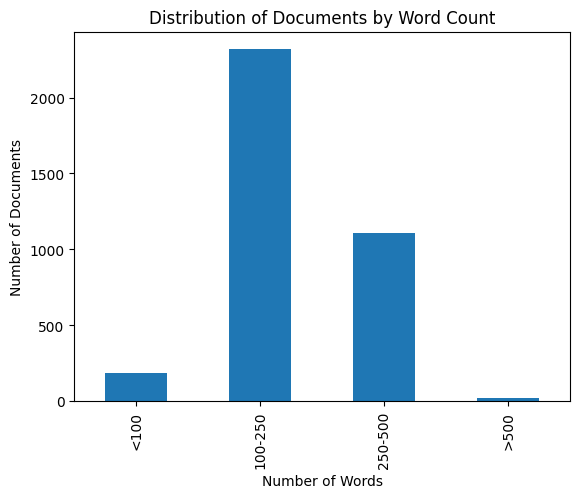

In [7]:
bins = [0,100,250, 500, float('inf')]
labels = ['<100','100-250', '250-500', '>500']

# Criação da nova coluna 'word_category'
df_docs['word_category'] = pd.cut(df_docs['n_words'], bins=bins, labels=labels)

# Contagem dos documentos em cada categoria
doc_counts = df_docs['word_category'].value_counts().sort_index()

# Criação do gráfico de barras
doc_counts.plot.bar()
plt.xlabel('Number of Words')
plt.ylabel('Number of Documents')
plt.title('Distribution of Documents by Word Count')
plt.show()

#### Documents with more citations


1º MED-5337 (329 queries), title: Intensive lifestyle changes may affect the progression of prostate cancer. 

2º MED-5341 (314 queries), title: Effects of a low-fat, high-fiber diet and exercise program on breast cancer risk factors in vivo and tumor cell growth and apoptosis in vitro.

3º MED-5328 (310 queries), title: Vegetarian diets and incidence of diabetes in the Adventist Health Study-2.

4º MED-5333 (296 queries), title: Vegetarian diet affects genes of oxidative metabolism and collagen synthesis.

5º MED-5339' (288 queries), title: Is Escherichia coli urinary tract infection a zoonosis? Proof of direct link with production animals and meat.

In [8]:
df_qrels_topdpc = df_qrels.groupby('doc_id')['query_id'].count()
df_qrels_topdpc

doc_id
MED-10      1
MED-1000    1
MED-1002    1
MED-1003    1
MED-1004    1
           ..
MED-994     2
MED-995     1
MED-996     1
MED-998     1
MED-999     1
Name: query_id, Length: 3633, dtype: int64

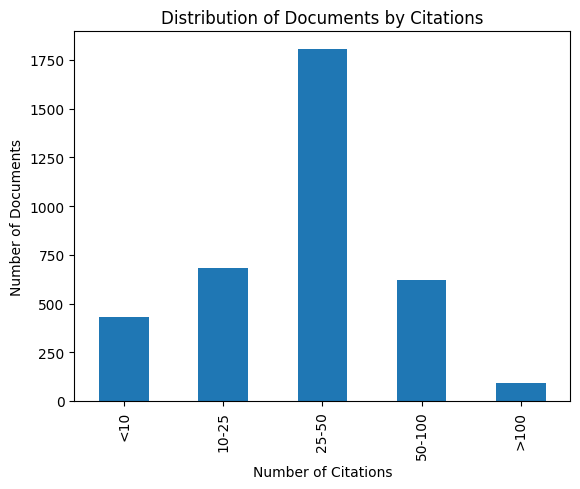

In [9]:
# Criação das categorias
bins = [0, 10, 25, 50, 100, float('inf')]
labels = ['<10','10-25', '25-50','50-100', '>100']

# Criação da nova coluna 'citation_category'
df_qrels_topdpc['citation_category'] = pd.cut(df_qrels_topdpc, bins=bins, labels=labels)

# Contagem dos documentos em cada categoria
doc_citation_counts = df_qrels_topdpc['citation_category'].value_counts().sort_index()

# Criação do gráfico de barras
doc_citation_counts.plot.bar()
plt.xlabel('Number of Citations')
plt.ylabel('Number of Documents')
plt.title('Distribution of Documents by Citations')
plt.show()

### Most common words in the documents

In [16]:
# Definir as stop words
stop_words = set(stopwords.words('english'))

# Converter o texto para maiúsculas e dividir em palavras
words = df_docs['text'].str.lower().str.split()

# Achatar a lista de listas em uma única lista de palavras
words = list(itertools.chain(*words))

# Remover as stop words
words = [word for word in words if word not in stop_words]

# Contar a frequência de cada palavra
word_counts = collections.Counter(words)

# Exibir as palavras mais comuns
word_counts.most_common()

[('risk', 2822),
 ('=', 2304),
 ('dietary', 2023),
 ('intake', 2016),
 ('study', 1976),
 ('associated', 1973),
 ('cancer', 1962),
 ('may', 1899),
 ('patients', 1683),
 ('studies', 1667),
 ('diet', 1631),
 ('consumption', 1546),
 ('increased', 1425),
 ('food', 1403),
 ('total', 1383),
 ('effects', 1365),
 ('levels', 1325),
 ('significantly', 1310),
 ('also', 1242),
 ('health', 1216),
 ('results', 1206),
 ('compared', 1202),
 ('significant', 1197),
 ('high', 1114),
 ('effect', 1094),
 ('(p', 1086),
 ('using', 1073),
 ('disease', 1054),
 ('data', 1047),
 ('higher', 1033),
 ('among', 1019),
 ('women', 1013),
 ('p', 1013),
 ('human', 1012),
 ('used', 1001),
 ('95%', 956),
 ('<', 953),
 ('lower', 950),
 ('blood', 925),
 ('association', 901),
 ('breast', 886),
 ('concentrations', 874),
 ('2', 857),
 ('results:', 851),
 ('treatment', 845),
 ('group', 844),
 ('however,', 831),
 ('found', 829),
 ('evidence', 823),
 ('subjects', 811),
 ('clinical', 805),
 ('exposure', 804),
 ('serum', 787),
 ('ce

## Queries Analysis
NutritionFacts.org queries data (.queries files, 5 different types) – natural, non-technical language


#### Number of queries

NFCorpus contains a total of 3,237 natural language queries (written in non-technical English, harvested from the NutritionFacts.org site).
Each query has a unique identifier, a text which correspond to a title of a video (or a topic) in NutritionFacts.org and a url to the video.

In [11]:
dataset.queries_count()

3237

#### Mean of the number of words in the queries

The mean of the number of words in the queries is 3.32.
The Max number of words in a query is  18 and the Min number is 1

In [12]:
df_queries['n_words'] = df_queries['text'].apply(lambda x: len(str(x).split()))
float(df_queries['n_words'].mean())

3.318813716404078

#### Queries with more citations

1º Plain-812 (1363 docs), text: "Cancer" (625 videos)

2º Plain-1878 (1166 docs), text: "plant-based diets" (545 videos)

3º Plain-1585 (1155 docs), text: "meat" (504 videos)

4º Plain-2316 (1122 docs), text: "vegetables" (493 videos)

5º Plain-1226 (1076 docs), text: "fruit" (461 videos)

In [13]:
df_qrels_topquery = df_qrels.groupby('query_id')['doc_id'].count()
df_qrels_topquery

query_id
PLAIN-1        49
PLAIN-10       79
PLAIN-100      41
PLAIN-1000      4
PLAIN-1002     17
             ... 
PLAIN-995       1
PLAIN-996       3
PLAIN-997       2
PLAIN-998     744
PLAIN-999       1
Name: doc_id, Length: 3237, dtype: int64

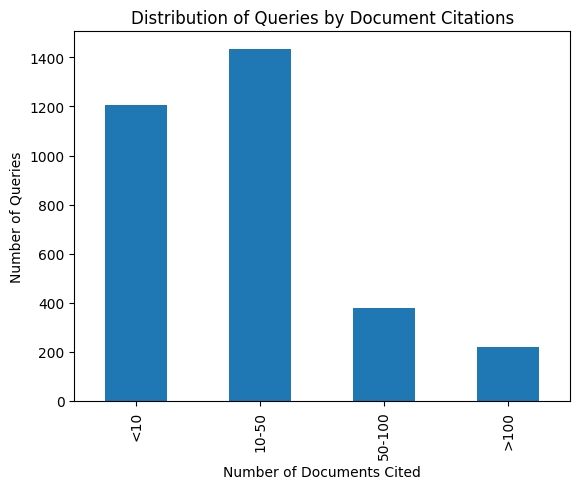

In [14]:
# Criação das categorias
bins = [0, 10, 50, 100, float('inf')]
labels = ['<10','10-50', '50-100', '>100']

# Criação da nova coluna 'doc_category'
df_qrels_topquery = df_qrels_topquery.to_frame(name='doc_count')
df_qrels_topquery['doc_category'] = pd.cut(df_qrels_topquery['doc_count'], bins=bins, labels=labels)

# Contagem das queries em cada categoria
query_doc_counts = df_qrels_topquery['doc_category'].value_counts().sort_index()

# Criação do gráfico de barras
query_doc_counts.plot.bar()
plt.xlabel('Number of Documents Cited')
plt.ylabel('Number of Queries')
plt.title('Distribution of Queries by Document Citations')
plt.show()

### Most common words in the queries

In [15]:
from nltk.corpus import stopwords
import itertools
import collections

# Definir as stop words
stop_words = set(stopwords.words('english'))

# Converter o texto para maiúsculas e dividir em palavras
words = df_queries['text'].str.lower().str.split()

# Achatar a lista de listas em uma única lista de palavras
words = list(itertools.chain(*words))

# Remover as stop words
words = [word for word in words if word not in stop_words]

# Contar a frequência de cada palavra
word_counts = collections.Counter(words)

# Exibir as palavras mais comuns
word_counts.most_common() 

[('cancer', 147),
 ('diet', 103),
 ('health', 73),
 ('breast', 70),
 ('disease', 67),
 ('vs.', 66),
 ('meat', 62),
 ('food', 57),
 ('&', 56),
 ('tea', 47),
 ('you?', 46),
 ('good', 46),
 ('oil', 39),
 ('heart', 36),
 ('vitamin', 35),
 ('foods', 33),
 ('chicken', 33),
 ('prevent', 32),
 ('may', 31),
 ('cholesterol', 30),
 ('treating', 30),
 ('plant-based', 30),
 ('juice', 30),
 ('milk', 30),
 ('dietary', 28),
 ('fish', 27),
 ('fat', 27),
 ('preventing', 27),
 ('best', 27),
 ('diets', 26),
 ('beans', 26),
 ('acid', 25),
 ('risk', 25),
 ('fruit', 24),
 ('soy', 23),
 ('dr.', 23),
 ('blood', 21),
 ('diabetes', 21),
 ('supplements', 21),
 ('cancer?', 20),
 ('seeds', 20),
 ('study', 20),
 ('protein', 20),
 ('bad', 19),
 ('nuts', 19),
 ('much', 19),
 ('versus', 19),
 ('brain', 18),
 ('nutrition', 18),
 ('new', 17),
 ('cause', 17),
 ('eating', 17),
 ('pollutants', 17),
 ('liver', 17),
 ('rice', 16),
 ('turmeric', 16),
 ('safe?', 16),
 ('medicine', 16),
 ('treatment', 16),
 ('broccoli', 16),
 ('